In [149]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housingMedianAge: Median age of a house within a block; a lower number is a newer building
- totalRooms: Total number of rooms within a block
- totalBedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- medianHouseValue: Median house value for households within a block (measured in US Dollars)
- oceanProximity: Location of the house w.r.t ocean/sea

In [150]:
df = pd.read_csv('/Users/christianl/repos/real-estate/data/raw/housing.csv')

In [151]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [153]:
df.dropna(inplace=True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [155]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [157]:
trian_df = X_train.join(y_train)

In [158]:
trian_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6998,-118.04,33.95,36.0,2722.0,515.0,1390.0,486.0,3.8214,<1H OCEAN,178500.0
15910,-122.42,37.74,52.0,1271.0,353.0,1076.0,324.0,2.9911,NEAR BAY,263900.0
5837,-118.34,34.19,41.0,1524.0,393.0,1176.0,375.0,2.8750,<1H OCEAN,192400.0
14734,-117.02,32.81,14.0,3173.0,599.0,1451.0,585.0,3.7292,<1H OCEAN,182200.0
11086,-117.89,33.83,35.0,2984.0,446.0,1435.0,455.0,5.6276,<1H OCEAN,200800.0
...,...,...,...,...,...,...,...,...,...,...
15787,-122.39,37.79,52.0,94.0,24.0,113.0,27.0,4.6563,NEAR BAY,350000.0
518,-122.24,37.82,52.0,3665.0,517.0,1470.0,520.0,6.1550,NEAR BAY,398600.0
3726,-118.42,34.18,30.0,1323.0,353.0,856.0,333.0,3.3594,<1H OCEAN,202200.0
4903,-118.25,34.01,30.0,962.0,291.0,1280.0,263.0,1.4464,<1H OCEAN,110200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

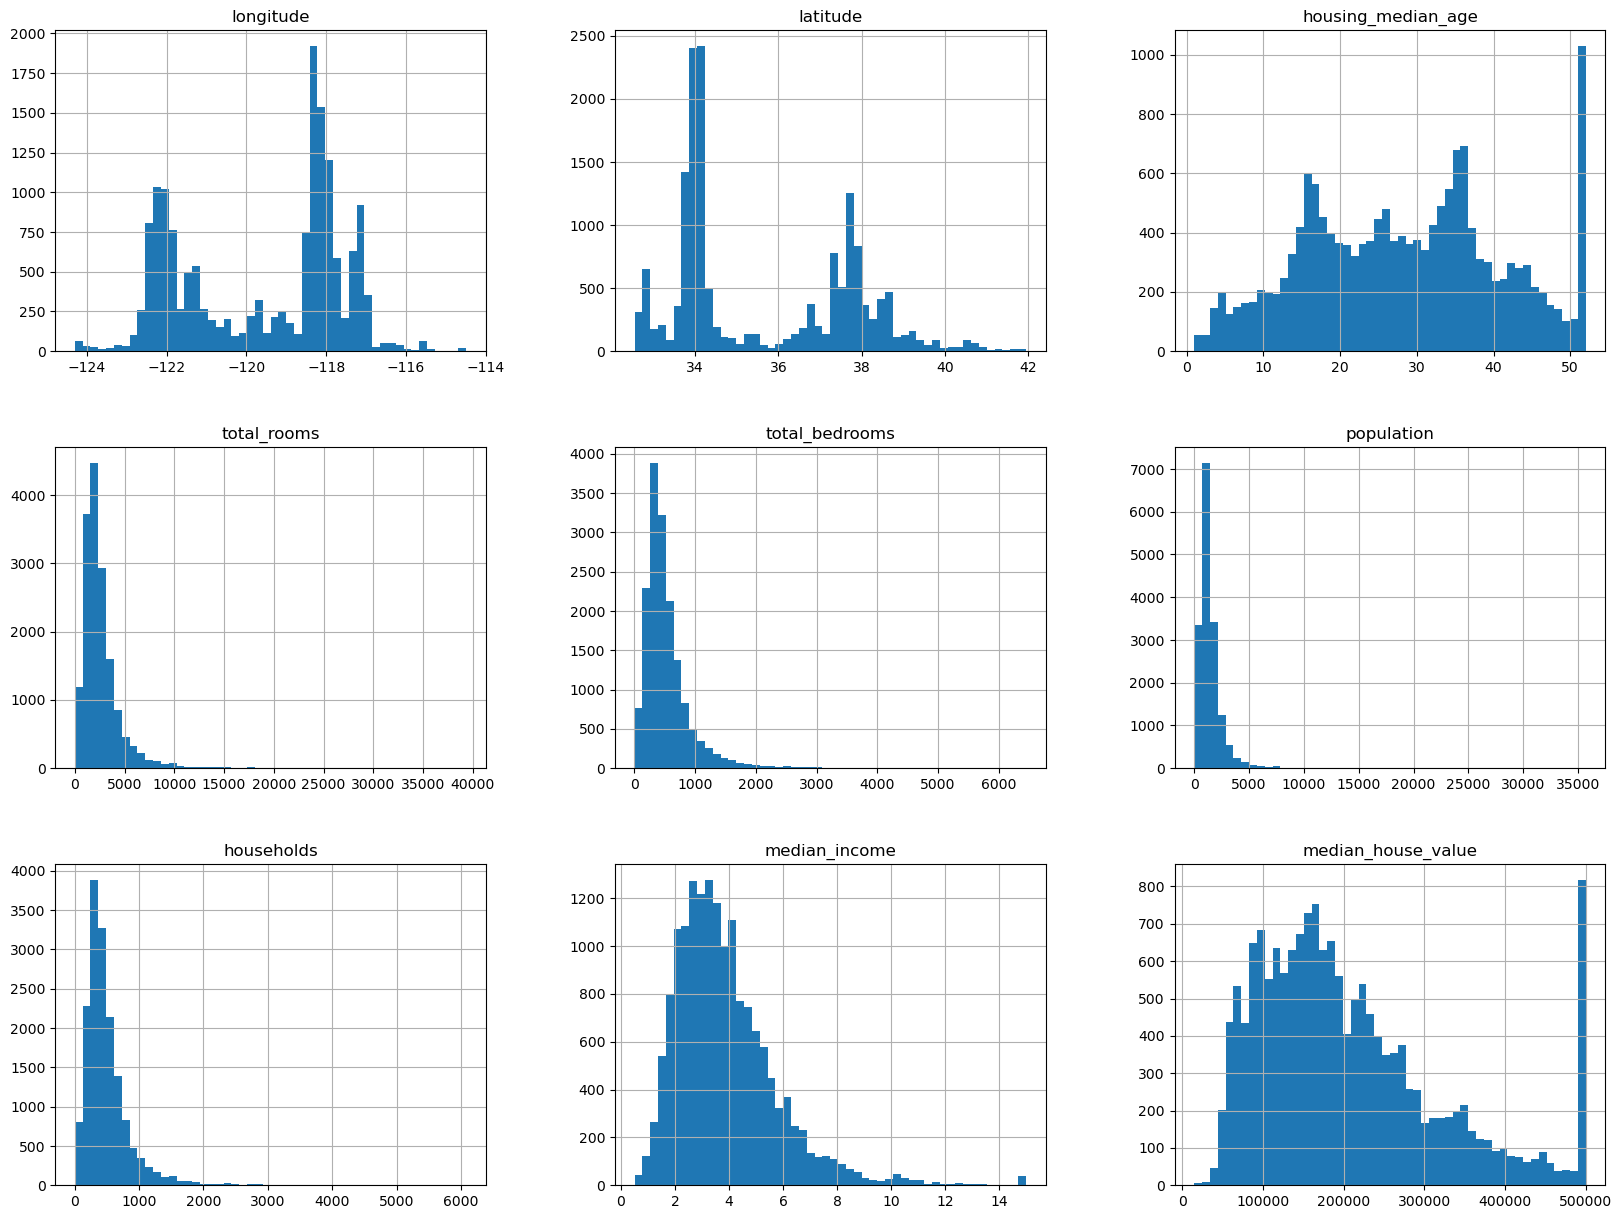

In [159]:
trian_df.hist(bins=50, figsize=(20,15)) 

In [160]:
trian_df.corr()

/var/folders/ll/73c51kv535z52nyks80l9vmw0000gn/T/ipykernel_17664/527353625.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924816,-0.111007,0.039218,0.061115,0.089868,0.047827,-0.014690,-0.042662
latitude,-0.924816,1.000000,0.014458,-0.029450,-0.057332,-0.098431,-0.061990,-0.079395,-0.146068
housing_median_age,-0.111007,0.014458,1.000000,-0.359837,-0.320035,-0.296477,-0.302489,-0.119522,0.107276
total_rooms,0.039218,-0.029450,-0.359837,1.000000,0.933081,0.859946,0.920789,0.191223,0.124196
total_bedrooms,0.061115,-0.057332,-0.320035,0.933081,1.000000,0.878815,0.979163,-0.010806,0.041185
population,0.089868,-0.098431,-0.296477,0.859946,0.878815,1.000000,0.908963,0.002650,-0.030245
households,0.047827,-0.061990,-0.302489,0.920789,0.979163,0.908963,1.000000,0.010324,0.056784
median_income,-0.014690,-0.079395,-0.119522,0.191223,-0.010806,0.002650,0.010324,1.000000,0.690565
median_house_value,-0.042662,-0.146068,0.107276,0.124196,0.041185,-0.030245,0.056784,0.690565,1.000000


In [161]:
# plotly express heatmap of the correlation matrix with the values annotated in the cells
fig = px.imshow(trian_df.corr(), color_continuous_scale='RdBu', text_auto=True, aspect='auto')
fig.update_layout(title='Correlation Matrix', width=800, height=800)
fig.show()

/var/folders/ll/73c51kv535z52nyks80l9vmw0000gn/T/ipykernel_17664/1651477277.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [162]:
trian_df['total_rooms'] = np.log(trian_df['total_rooms'] + 1)
trian_df['total_bedrooms'] = np.log(trian_df['total_bedrooms'] + 1)
trian_df['population'] = np.log(trian_df['population'] + 1)
trian_df['households'] = np.log(trian_df['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

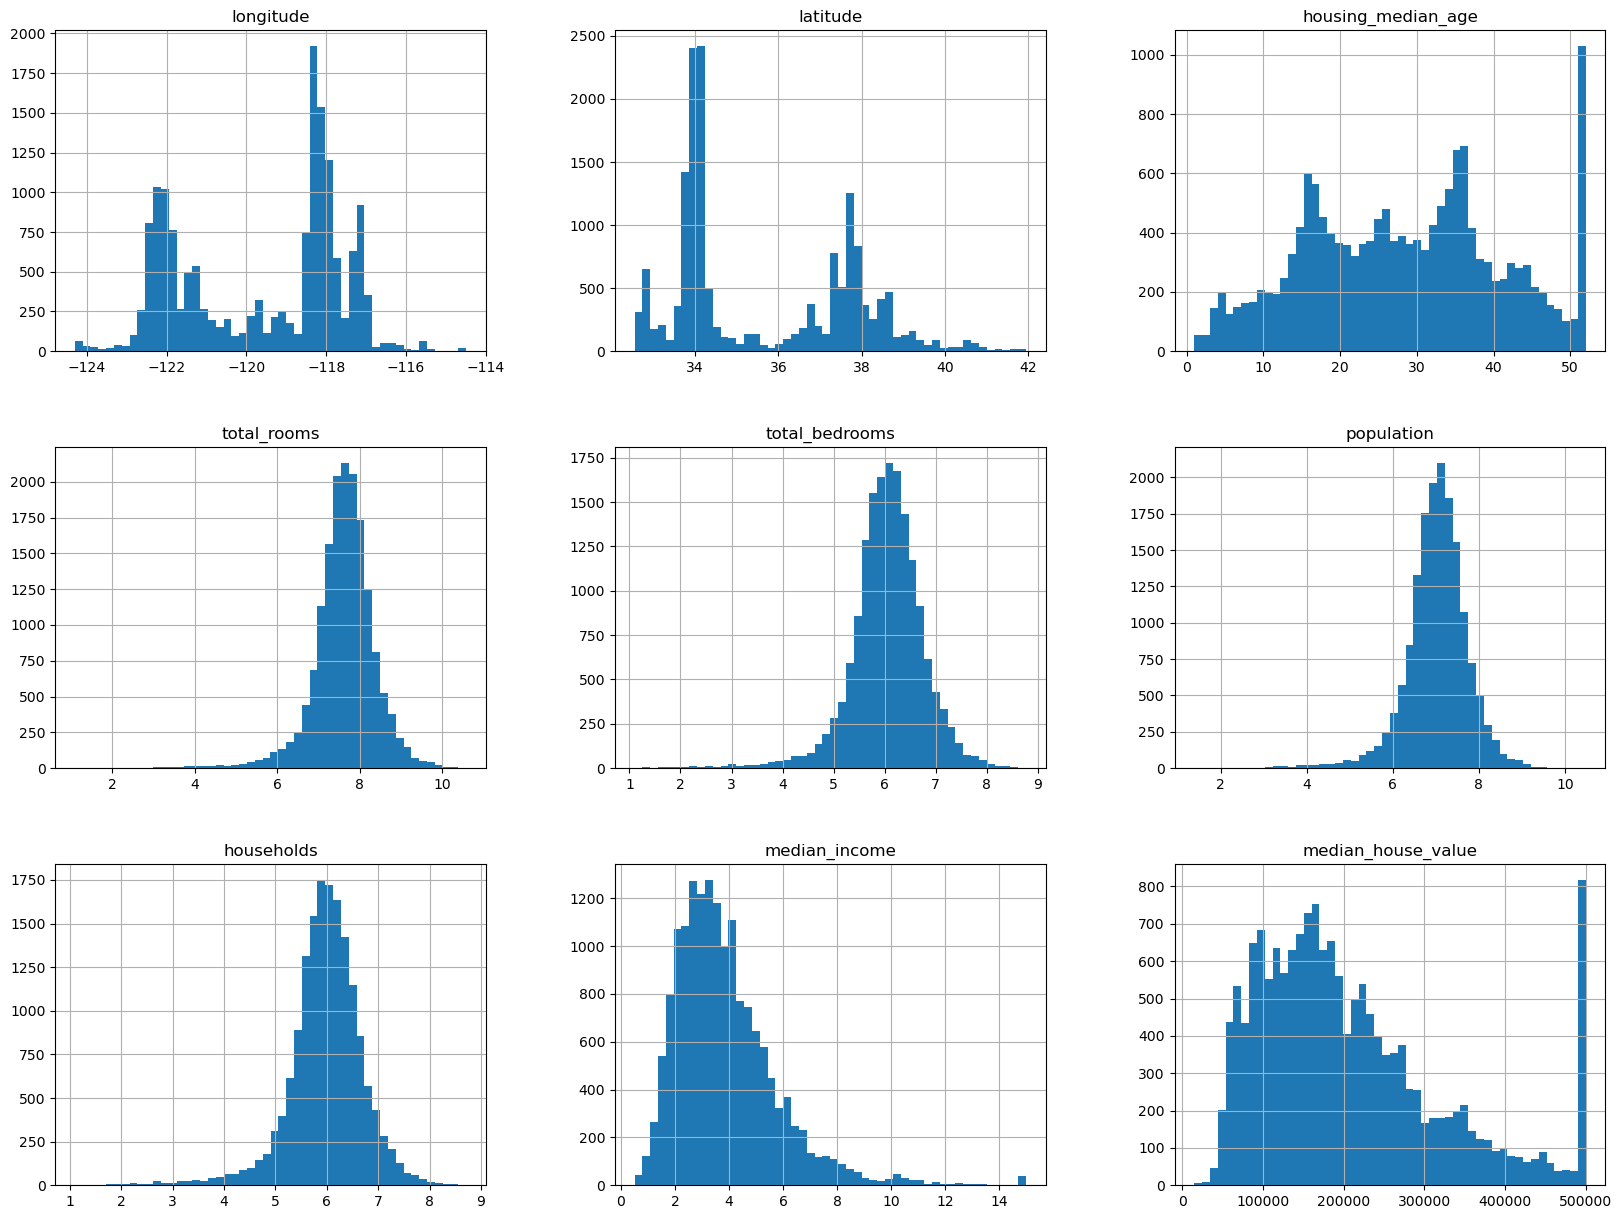

In [163]:
trian_df.hist(bins=50, figsize=(20,15))

In [164]:
trian_df.ocean_proximity.value_counts()

<1H OCEAN     7237
INLAND        5173
NEAR OCEAN    2093
NEAR BAY      1840
ISLAND           3
Name: ocean_proximity, dtype: int64

In [165]:
pd.get_dummies(trian_df.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6998,1,0,0,0,0
15910,0,0,0,1,0
5837,1,0,0,0,0
14734,1,0,0,0,0
11086,1,0,0,0,0
...,...,...,...,...,...
15787,0,0,0,1,0
518,0,0,0,1,0
3726,1,0,0,0,0
4903,1,0,0,0,0


In [166]:
trian_df = trian_df.join(pd.get_dummies(trian_df.ocean_proximity)).drop('ocean_proximity', axis=1)

In [167]:
# plotly express heatmap of the correlation matrix with the values annotated in the cells rounded to 2 decimal places
fig = px.imshow(trian_df.corr().round(2), color_continuous_scale='RdBu', text_auto=True, aspect='auto')
fig.update_layout(title='Correlation Matrix', width=1000, height=600)
fig.show()

In [168]:
# plot the latitude and longitude of the data points colored by the median house value
fig = px.scatter(trian_df, x='latitude', y='longitude', color='median_house_value', color_continuous_scale='RdBu', size='median_house_value', size_max=10, opacity=0.5)
fig.update_layout(title='Median House Value by Location', width=1000, height=600)
fig.show()

In [169]:
# bedrooms ratio is the number of bedrooms per room
# household rooms is the number of rooms per household
trian_df['bedrooms_ratio'] = trian_df['total_bedrooms'] / trian_df['total_rooms']
trian_df['household_rooms'] = trian_df['total_rooms'] / trian_df['households']

In [170]:
# plotly express heatmap of the correlation matrix with the values annotated in the cells rounded to 2 decimal places
fig = px.imshow(trian_df.corr().round(2), color_continuous_scale='RdBu', text_auto=True, aspect='auto')
fig.update_layout(title='Correlation Matrix', width=1000, height=600)
fig.show()

 ## Linear Regression Model

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = trian_df.drop(['median_house_value'], axis=1), trian_df['median_house_value']
X_train_s = scaler.fit_transform(X_train)

lr = LinearRegression()

lr.fit(X_train_s, y_train)

LinearRegression()

In [181]:
test_df = X_test.join(y_test)

test_df['total_rooms'] = np.log(test_df['total_rooms'] + 1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms'] + 1)
test_df['population'] = np.log(test_df['population'] + 1)
test_df['households'] = np.log(test_df['households'] + 1)

test_df = test_df.join(pd.get_dummies(test_df.ocean_proximity)).drop('ocean_proximity', axis=1)

test_df['bedrooms_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['household_rooms'] = test_df['total_rooms'] / test_df['households']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [173]:
X_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df['median_house_value']

In [179]:
X_test_s = scaler.transform(X_test)

In [174]:
# assert that the number of columns in the training set is equal to the number of columns in the test set
assert X_train.shape[1] == X_test.shape[1]

In [180]:
lr.score(X_test_s, y_test)

0.6649273778276603

 ## Random Forest Model

In [191]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_s, y_train)

RandomForestRegressor()

In [192]:
rf.score(X_test_s, y_test)

0.8164472558539623

In [203]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [207]:
best_forest = grid.best_estimator_

In [208]:
best_forest

RandomForestRegressor(n_estimators=300)

In [209]:
best_forest.score(X_test_s, y_test)

0.81863967604725